# Creer un premier neurone 
Dans ce notebook, nous allons créer un neurone de facon manuelle.

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

Dimensions de X: (100, 2)
Dimensions de y: (100, 1)


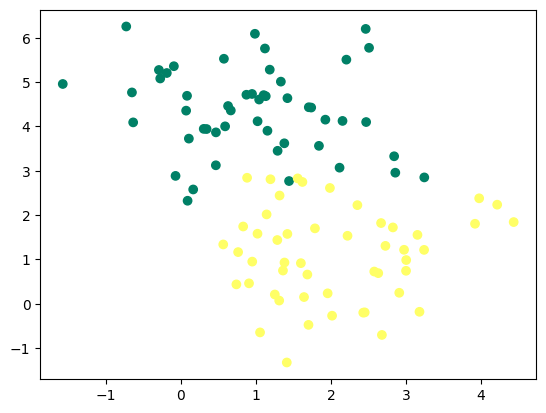

In [76]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape(y.shape[0], 1)
print(f"Dimensions de X: {X.shape}")
print(f"Dimensions de y: {y.shape}")

plt.scatter(X[:,0], X[:,1], c=y, cmap = "summer")
plt.show()

In [77]:
def iniialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W,b)

In [90]:
def model(X, W, b):
    Z = X.dot(W) + b
    A = 1 / (1 + np.exp(-Z))
    return A

In [91]:
def log_loss(A,y):
    return 1/len(y)*np.sum(-y*np.log(A) - (1-y)*np.log(1-A))

In [92]:
def gradients(A,X, y):
    dW = 1/len(y)*np.dot(X.T, A-y)
    db = 1/len(y)*np.sum(A-y)
    return (dW, db)

In [93]:
def update(dW, db, W, b, learning_rate):
    W = W - learning_rate*dW
    b = b - learning_rate*db
    return (W, b)

In [119]:
def predict(X, W, b):
    A = model(X, W, b)
    print("Probabilité:", A)
    return A >= 0.5

In [97]:
from sklearn.metrics import accuracy_score

In [104]:
def artificial_neuron(X, y, learning_rate = 0.1, n_iter = 100):
    # Initialisation de W, b
    W, b = iniialisation(X)

    Loss = []
    
    for _ in range(n_iter):
        A = model(X, W, b)
        Loss.append(log_loss(A, y))
        dW, db = gradients(A,X, y)
        W, b = update(dW, db, W, b, learning_rate)
    
    y_pred = predict(X, W, b)
    print("Performance: ", accuracy_score(y, y_pred))


    plt.plot(Loss)
    plt.show()

    return (W, b)


Performance:  0.84


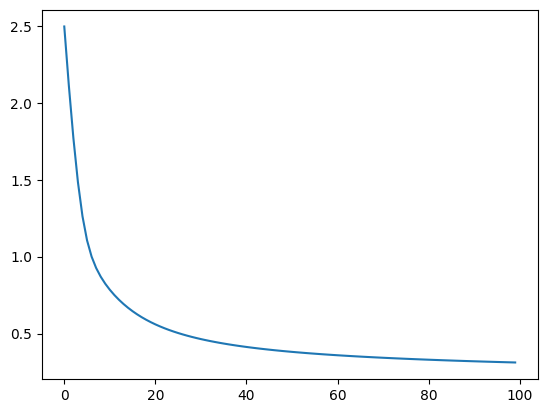

In [108]:
W, b = artificial_neuron(X, y)

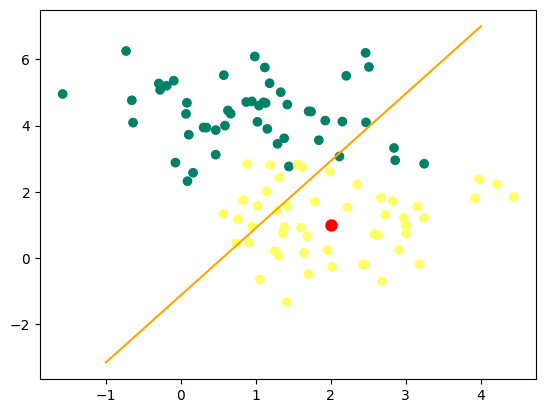

Probabilité: [0.82094062]


array([ True])

In [121]:
new_plant = np.array([2,1])

x0 = np.linspace(-1, 4, 100)
x1 = (-W[0]*x0 -b) /W[1]



plt.scatter(X[:,0], X[:,1], c=y, cmap = "summer")
plt.plot(x0, x1, c='orange')
plt.scatter(new_plant[0], new_plant[1], c="r", lw=3)
plt.show()

predict(new_plant, W, b)